In [ ]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 155335 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.27-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.27-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.27-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
import pandas as pd
import numpy as np


In [3]:
weather = pd.read_excel('/content/drive/My Drive/LCD_sample_data.xlsx')
print(weather)
median1 = weather["dry_bulb"].median()
weather["dry_bulb"].fillna(median1,inplace = True)
median2 = weather["wet_bulb"].median()
weather["wet_bulb"].fillna(median2,inplace = True)
median3 = weather["Rel_Hum"].median()
weather["Rel_Hum"].fillna(median3,inplace = True)
median4 = weather["dew_point"].median()
weather["dew_point"].fillna(median4,inplace = True)
median5 = weather["Station_Press"].median()
weather["Station_Press"].fillna(median5,inplace = True)

      dry_bulb  wet_bulb  dew_point  Rel_Hum  Station_Press
0          6.7       3.9        0.0     63.0          27.78
1          6.7       3.9        0.0     63.0          27.75
2          5.6       3.7        1.7     76.0          27.78
3          5.6       4.0        2.2     79.0          27.79
4          5.6       4.4        3.3     85.0          27.79
...        ...       ...        ...      ...            ...
3086      16.7      12.3        7.2     54.0          27.91
3087      15.0      11.4        7.8     62.0          27.92
3088      15.0      11.4        7.8     62.0          27.92
3089      13.3      10.4        7.8     70.0          27.90
3090      13.3      10.4        7.8     70.0          27.90

[3091 rows x 5 columns]


In [ ]:
#x=[weather["dry_bulb"],weather["wet_bulb"],weather["dew_point"],weather["Rel_Hum"]]
#y=[weather["Station_Press"]]

In [4]:
from sklearn.model_selection import train_test_split
Train,Test = train_test_split(weather,test_size = 0.2)

In [5]:
x=[Train["dry_bulb"],Train["wet_bulb"],Train["dew_point"],Train["Rel_Hum"]]
y=[Train["Station_Press"]]
X=[Test["dry_bulb"],Test["wet_bulb"],Test["dew_point"],Test["Rel_Hum"]]
Y=[Test["Station_Press"]]
print(x)
print(y)

[1004    10.6
1701    12.8
2034    10.0
1043     8.9
1317     8.3
        ... 
1623     6.7
2933     9.4
2679     4.4
1639    18.3
1851    10.6
Name: dry_bulb, Length: 2472, dtype: float64, 1004     9.3
1701    12.0
2034     9.3
1043     6.3
1317     6.4
        ... 
1623     3.0
2933     6.8
2679     1.6
1639    13.3
1851     7.8
Name: wet_bulb, Length: 2472, dtype: float64, 1004     8.3
1701   -17.2
2034     8.9
1043     3.3
1317     4.4
        ... 
1623    -8.9
2933     3.9
2679    -3.3
1639     5.6
1851     5.0
Name: dew_point, Length: 2472, dtype: float64, 1004    86.0
1701    11.0
2034    93.0
1043    68.0
1317    77.0
        ... 
1623    32.0
2933    69.0
2679    58.0
1639    43.0
1851    69.0
Name: Rel_Hum, Length: 2472, dtype: float64]
[1004    26.98
1701    27.83
2034    27.66
1043    27.29
1317    27.80
        ...  
1623    27.89
2933    27.76
2679    27.80
1639    27.85
1851    27.65
Name: Station_Press, Length: 2472, dtype: float64]


In [6]:
from sklearn.preprocessing import StandardScaler 
Scaler = StandardScaler() 
x = Scaler.fit_transform(x) 
X = Scaler.fit_transform(X) 
#print(x)
#print(X.shape)
y=np.array(y)
Y=np.array(Y)
print(y)
print(Y.shape)
#print(x.size)
#print(y.size)
x=np.transpose(x)
X=np.transpose(X)
y=np.transpose(y)
Y=np.transpose(Y)

[[26.98 27.83 27.66 ... 27.8  27.85 27.65]]
(1, 619)


Epoch 1/100
25/25 [==============================] - 1s 13ms/step - loss: 682.3141 - val_loss: 672.5340
Epoch 2/100
25/25 [==============================] - 0s 6ms/step - loss: 663.9318 - val_loss: 652.7321
Epoch 3/100
25/25 [==============================] - 0s 5ms/step - loss: 642.6464 - val_loss: 629.7811
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 617.9999 - val_loss: 603.2181
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 589.5908 - val_loss: 572.7725
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 557.2068 - val_loss: 538.2321
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 520.6882 - val_loss: 499.5423
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 480.0995 - val_loss: 456.8894
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss: 435.5493 - val_loss: 410.0925
Epoch 10/100
25/25 [==============================] - 0s 3ms/step - loss

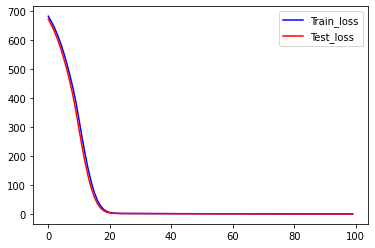

In [12]:
from tensorflow import keras
import matplotlib.pyplot as plt
model = keras.Sequential([
        keras.layers.Dense(5,activation='relu',input_shape=[4]),
        keras.layers.Dense(5,activation='relu'),
        keras.layers.Dense(1)])

model.compile(loss='mean_squared_error',optimizer='Adam')
history=model.fit(x,y,batch_size = 100,epochs=100,validation_data=(X,Y))
loss=history.history['loss']
val_loss=history.history['val_loss']
plt.plot(loss,'blue', label='Train_loss')
plt.plot(val_loss,'red', label='Test_loss')
plt.legend()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
plt.plot(loss)

NameError: ignored